## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

## Importing Data

In [2]:
df = pd.read_csv("daily-total-female-births-CA.csv")

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<Axes: >

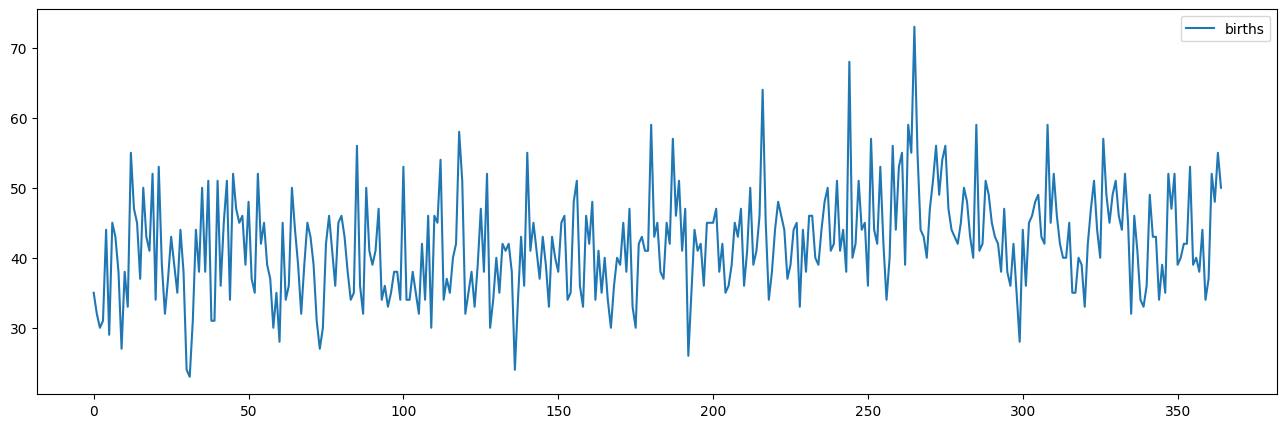

In [4]:
#Plotting the line chart
df.plot(figsize=(16,5))

In [9]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.dropna(axis=0,inplace=True)

## Initialising the Model

In [11]:
model=Prophet()

In [12]:
display(df)

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


## Fitting the model

In [13]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph5kzyfy0/h0bo77ij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph5kzyfy0/sr1tmfmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35663', 'data', 'file=/tmp/tmph5kzyfy0/h0bo77ij.json', 'init=/tmp/tmph5kzyfy0/sr1tmfmu.json', 'output', 'file=/tmp/tmph5kzyfy0/prophet_modelj0lyby42/prophet_model-20230920072722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Create future dates of 365 days

In [18]:
future_dates=model.make_future_dataframe(periods=365)
display(future_dates)

,ds
0,1959-01-01
1,1959-01-02
2,1959-01-03
3,1959-01-04
4,1959-01-05
...,...
725,1960-12-26
726,1960-12-27
727,1960-12-28
728,1960-12-29


## Making the Prediction

In [19]:
prediction=model.predict(future_dates)
display(future_dates)

,ds
0,1959-01-01
1,1959-01-02
2,1959-01-03
3,1959-01-04
4,1959-01-05
...,...
725,1960-12-26
726,1960-12-27
727,1960-12-28
728,1960-12-29


## Plotting the Predicted Projection

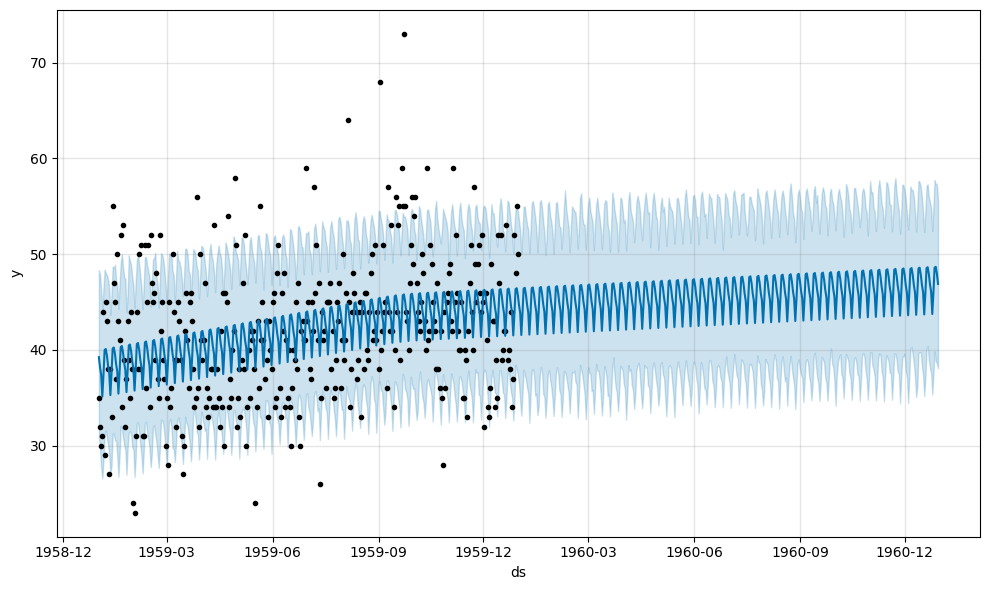

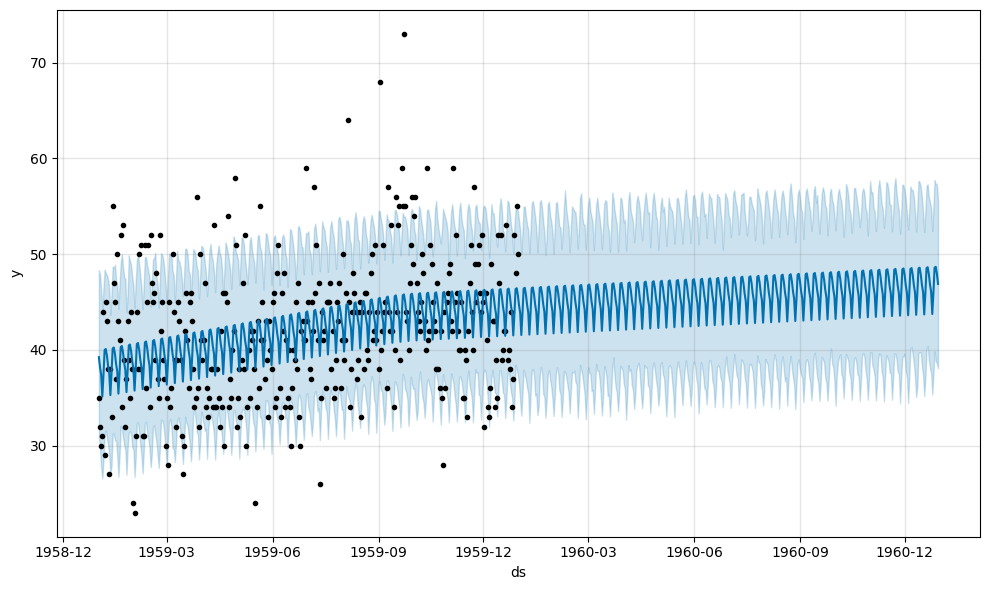

In [20]:
model.plot(prediction)

## Visualizing Components : [Trends,yearly]

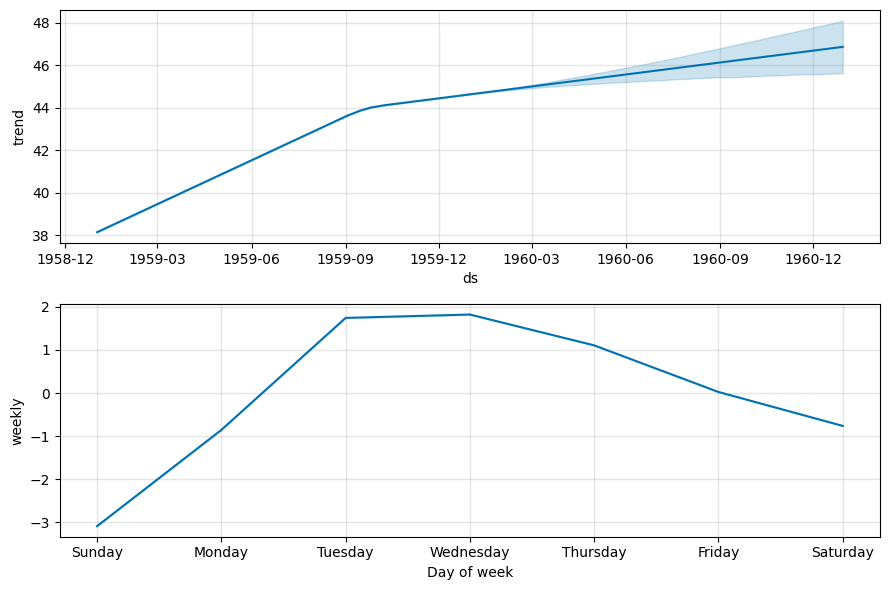

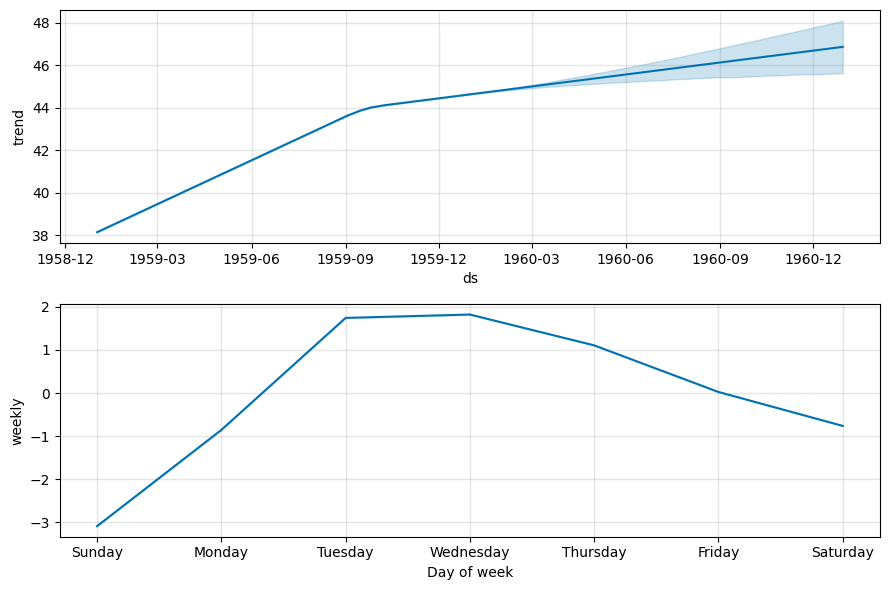

In [21]:
model.plot_components(prediction)